# Gráficos e informações para poster da EXPOTEC

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

In [2]:
lic = pd.read_csv("licitacao.txt", sep="|", dtype={'cd_ugestora': str,'de_ugestora': str,'nu_licitacao': str,
                                                   'tp_licitacao': float,'de_tipolicitacao': str, 'tp_objeto': str,
                                                   'de_tipoobjeto': str, 'vl_licitacao': float,'de_obs': str}, 
                                                    engine='python', error_bad_lines=False, encoding = 'utf8')
jur = pd.read_csv("jurisdicionado.csv", dtype={'codigo_sagres': str})
prop = pd.read_csv("propostas_licitacao.txt", sep="|", dtype={'cod_unidade_gestora': str}, error_bad_lines=False)

Skipping line 144111: '|' expected after '"'
Skipping line 188932: '|' expected after '"'
Skipping line 198432: '|' expected after '"'
/home/mirian/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
lic_prop = pd.merge(prop, lic, left_on=["cod_unidade_gestora","cod_tipo_licitacao","numero_licitacao"], right_on=["cd_ugestora","tp_Licitacao","nu_Licitacao"], how="left")
lic_prop_jur = pd.merge(lic_prop, jur, left_on=["de_ugestora"], right_on=["nome"], how="left")

### Quais empresas perderam todas as licitações que participaram? Dessas, quais as que mais participaram de licitações?
Fazer um gráfico de barras onde apresente no eixo-x a quantidade de licitações que a empresa participou e no eixo-y o nome da empresa, ordenado da maior para a menor quantidade de licitações.

In [4]:
propostas = (prop['nome_proponente'].value_counts().rename_axis('nome_proponente').to_frame('situacao_proposta')
                   .join(pd.crosstab(prop['nome_proponente'], prop['situacao_proposta']))
                   .reset_index())

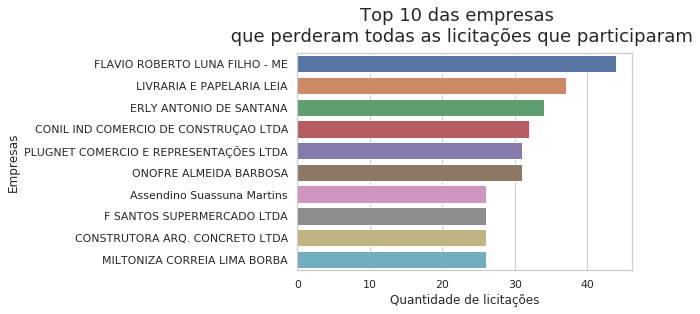

In [5]:
perdeu_tudo = propostas.loc[propostas['situacao_proposta'] == propostas['Perdedora']]
pt = perdeu_tudo[:10]
sns.set(style="whitegrid")
ax = sns.barplot(x="situacao_proposta", y="nome_proponente", data=pt, ci=None)
figure = ax.get_figure()    
ax.set(xlabel='Quantidade de licitações', ylabel='Empresas')
figure.suptitle('Top 10 das empresas \n que perderam todas as licitações que participaram', y=1.04, fontsize=18)
figure.savefig('perdeutudo.png', dpi=400, bbox_inches="tight")

### Quais as top-10 empresas que mais receberam dinheiro em licitações de municípios no último mandato (de 2017 até agora)?
Fazer um gráfico de barras onde apresente no eixo-x o valor total recebido pela empresa e no eixo-y o nome da empresa, ordenado do maior para o menor valor.

In [6]:
vencedoras = lic_prop_jur.groupby(lic_prop_jur['situacao_proposta']).get_group('Vencedora')
start_date  =  '01-01-2017' 
vencedoras['dt_Homologacao'] = pd.to_datetime(vencedoras['dt_Homologacao'])
mask = vencedoras['dt_Homologacao'] > start_date
mandato = vencedoras.loc[mask]

/home/mirian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


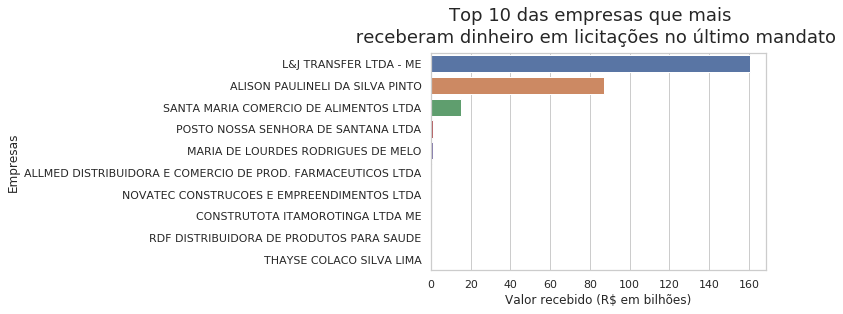

In [7]:
mais_recebeu = mandato[['nome_proponente','valor_ofertado']].groupby('valor_ofertado').sum().sort_values(by='valor_ofertado', ascending=False).reset_index()
mr = mais_recebeu[:10]
sns.set(style="whitegrid")
ax = sns.barplot(x="valor_ofertado", y="nome_proponente", data=mr, ci=None)
figure = ax.get_figure()   
ax.set(xlabel='Valor recebido (R$ em bilhões)', ylabel='Empresas')
ax.set_xticklabels(['{:,.0f}'.format(x) for x in ax.get_xticks()/1000000000])
figure.suptitle('Top 10 das empresas que mais \n receberam dinheiro em licitações no último mandato', y=1.04, fontsize=18)
figure.savefig('maisrecebeu.png', dpi=400, bbox_inches="tight")

### Quais os top-10 municípios que mais investiram dinheiro em licitações no último mandato (de 2017 até agora)?
Fazer um gráfico de barras onde apresente no eixo-x o valor total gasto pelo município e no eixo-y o nome do município, ordenado do maior para o menor valor.

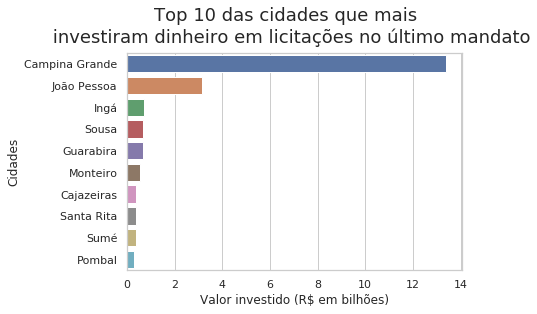

In [8]:
mais_investiu = mandato.groupby(['municipio_importacao'])['vl_Licitacao'].sum().to_frame().sort_values(by="vl_Licitacao",ascending=False).reset_index()
mi = mais_investiu[:10]
sns.set(style="whitegrid")
ax = sns.barplot(x="vl_Licitacao", y="municipio_importacao", data=mi, ci=None)
figure = ax.get_figure()    
ax.set(xlabel='Valor investido (R$ em bilhões)', ylabel='Cidades')
ax.set_xticklabels(['{:,.0f}'.format(x) for x in ax.get_xticks()/1000000000])
figure.suptitle('Top 10 das cidades que mais \n investiram dinheiro em licitações no último mandato', y=1.04, fontsize=18)
figure.savefig('maisinvestiu.png', dpi=400, bbox_inches="tight")

### Qual a quantidade total de licitações realizadas por ano?

Fazer um gráfico de barras onde apresente no eixo-x o ano e no eixo-y a quantidade.

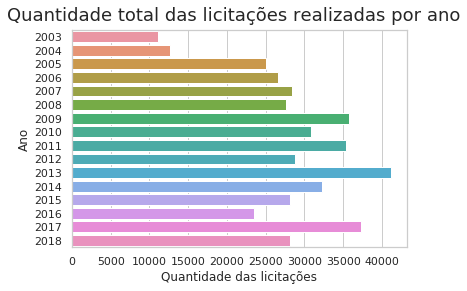

In [9]:
lic_prop_jur['year'] = pd.DatetimeIndex(lic_prop_jur['dt_Homologacao']).year
ano = lic_prop_jur.year.value_counts().to_frame().reset_index().rename(columns = {"index" : "year", "year" : "qtd_lic_ano"}).astype(int)
sns.set(style="whitegrid")
ax = sns.barplot(x="qtd_lic_ano", y="year", data=ano, ci=None, orient='h')
figure = ax.get_figure()    
ax.set(xlabel='Quantidade das licitações', ylabel='Ano')
figure.suptitle('Quantidade total das licitações realizadas por ano', y=0.96, fontsize=18)
figure.savefig('qtd_lic_ano.png', dpi=400, bbox_inches="tight")

### Qual o valor total das licitações realizadas por ano (podemos testar por mês também)?

Fazer um gráfico de barras onde apresente no eixo-x o ano e no eixo-y o valor total.


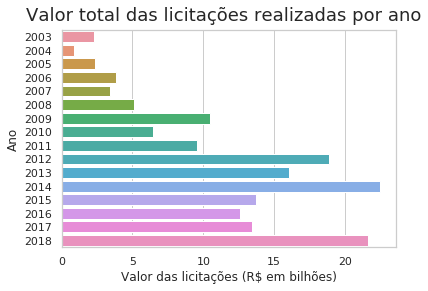

In [10]:
lic_prop_jur['year'] = lic_prop_jur.year.astype('Int64')
valor_lic_ano = lic_prop_jur.groupby(['year'])['vl_Licitacao']
v = valor_lic_ano.sum().to_frame().reset_index().rename(columns = {"index" : "year", "vl_Licitacao" : "valor"})
sns.set(style="whitegrid")
ax = sns.barplot(y="year", x="valor", data=v, ci=None, orient='h')
figure = ax.get_figure()    
ax.set(ylabel='Ano', xlabel='Valor das licitações (R$ em bilhões)')
ax.set_xticklabels(['{:,.0f}'.format(x) for x in ax.get_xticks()/1000000000])
figure.suptitle('Valor total das licitações realizadas por ano', y=0.96, fontsize=18)
figure.savefig('valor_lic_ano.png', dpi=400, bbox_inches="tight")

### Quantas empresas participaram de licitações no último mandato?

In [11]:
empresas = mandato.nome_proponente.value_counts()
empresas.count()

22554

### Qual o valor total das licitações realizadas no último mandato?

In [12]:
mandato.vl_Licitacao.sum()

30595964588.9

### Qual a quantidade total de licitações realizadas no último mandato?

In [13]:
mandato.qtd_ofertada.count()

55782

### Qual a quantidade total de licitações realizadas por tipo de licitação no último mandato (Pregão, Convite, etc)?

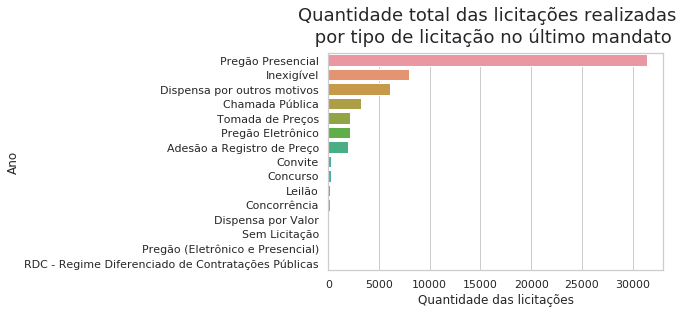

In [14]:
tipo_lic = mandato.tipo_licitacao.value_counts().to_frame().reset_index().rename(columns = {"index" : "tipo", "tipo_licitacao" : "qtd_tipo"})
sns.set(style="whitegrid")
ax = sns.barplot(y="tipo", x="qtd_tipo", data=tipo_lic, ci=None)
figure = ax.get_figure()    
ax.set(ylabel='Ano', xlabel='Quantidade das licitações')
figure.suptitle('Quantidade total das licitações realizadas \n por tipo de licitação no último mandato', y=1.04, fontsize=18)
figure.savefig('qtd_tipo.png', dpi=400, bbox_inches="tight")